In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [3]:
x

array([[-5.83391818,  3.95668959],
       [-6.9141647 ,  2.6977084 ],
       [-5.82363689,  4.67219247],
       ...,
       [ 4.77062826, -8.19043298],
       [ 4.7824783 , -5.63110053],
       [ 5.67948892, -5.7798081 ]], shape=(1000, 2))

In [4]:
y

array([1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1,
       0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1,

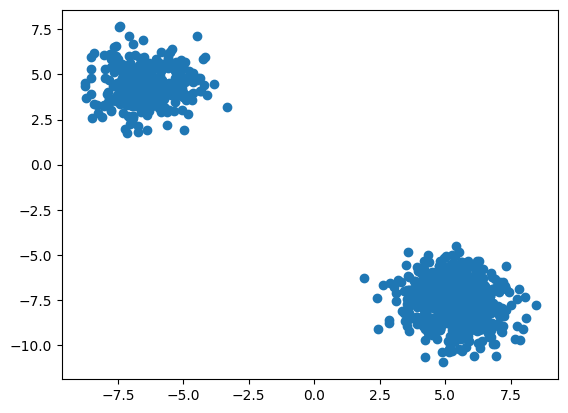

In [5]:
plt.scatter(x[:,0],x[:,-1])

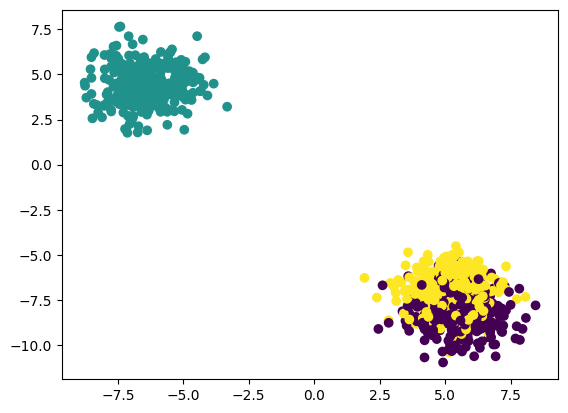

In [6]:
plt.scatter(x[:,0],x[:,-1],c=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    cluster=KMeans(n_clusters=k,init="k-means++")
    cluster.fit(x_train_scaled)
    print(cluster.inertia_)
    wcss.append(cluster.inertia_)


1500.000000000001
53.073270424681915
37.66323935076229
31.642937853519644
27.537499043763482
22.38170078531888
19.126101531420904
16.863697662152866
15.218140579431472
14.806670879496743


In [10]:
wcss

[1500.000000000001,
 53.073270424681915,
 37.66323935076229,
 31.642937853519644,
 27.537499043763482,
 22.38170078531888,
 19.126101531420904,
 16.863697662152866,
 15.218140579431472,
 14.806670879496743]

<function matplotlib.pyplot.show(close=None, block=None)>

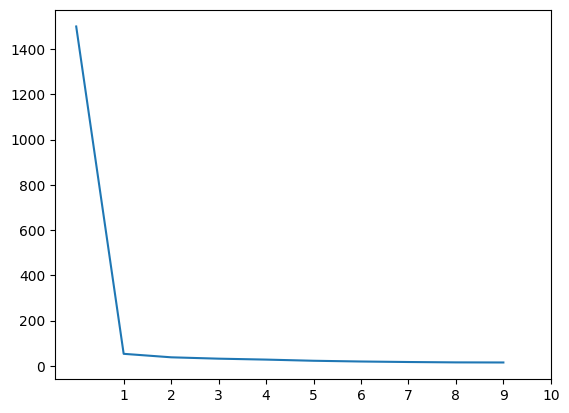

In [11]:
plt.plot(wcss)
plt.xticks(range(1,11))
plt.show

In [12]:
cluster1=KMeans(n_clusters=2,init="k-means++")
cluster1.fit(x_train_scaled)
y_pred=cluster1.predict(x_test_scaled)
y_pred_train=cluster1.predict(x_train_scaled)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

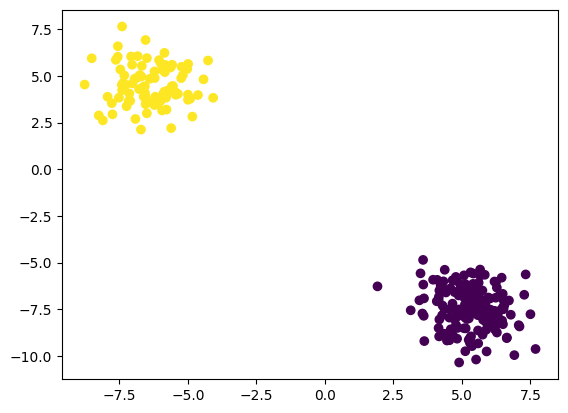

In [13]:
plt.scatter(x_test[:,0],x_test[:,-1],c=y_pred)

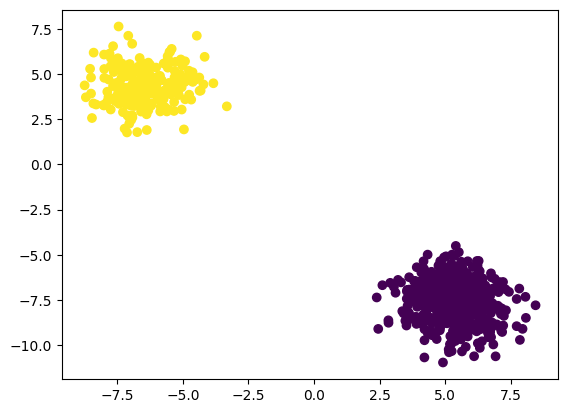

In [14]:
plt.scatter(x_train[:,0],x_train[:,-1],c=y_pred_train)

In [15]:
! pip install kneed

In [16]:
from kneed import KneeLocator
k=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

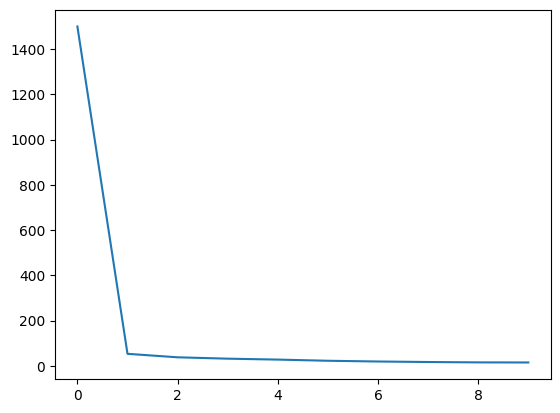

In [17]:
plt.plot(wcss)

In [19]:
k.elbow


np.int64(2)